**Time series is a sequence of data points collected or recorded at regular time intervals**

Example = Daily stock price , Monthly sale of a store

**Trend** = Long term movement or direction in the data

Example is Upward trend in company growth over years


**Seasionality** = Regular repeating patterns or cycles in my data

Example is Higher ice-cream sale in summers of every year


In [3]:
# Step - 1 Loading the librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# setp -2 Data loading
data = pd.read_csv("AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
# We are having records of how many passengers travelled in place from January 1949 to December 1960 for 12 years

In [6]:
print(data.to_string())  # To display full data

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
5    1949-06          135
6    1949-07          148
7    1949-08          148
8    1949-09          136
9    1949-10          119
10   1949-11          104
11   1949-12          118
12   1950-01          115
13   1950-02          126
14   1950-03          141
15   1950-04          135
16   1950-05          125
17   1950-06          149
18   1950-07          170
19   1950-08          170
20   1950-09          158
21   1950-10          133
22   1950-11          114
23   1950-12          140
24   1951-01          145
25   1951-02          150
26   1951-03          178
27   1951-04          163
28   1951-05          172
29   1951-06          178
30   1951-07          199
31   1951-08          199
32   1951-09          184
33   1951-10          162
34   1951-11          146
35   1951-12          166
36   1952-01          171
37   1952-02

In [7]:
# step -3 EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
# Convert Month column to correct data time format

data["Month"]=pd.to_datetime(data["Month"])

In [9]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [11]:
# Check for null values
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [12]:
# Check for duplicate value
data.duplicated().sum()

0

In [13]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [14]:
data.set_index("Month",inplace=True) # Making Month column as index

In [15]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

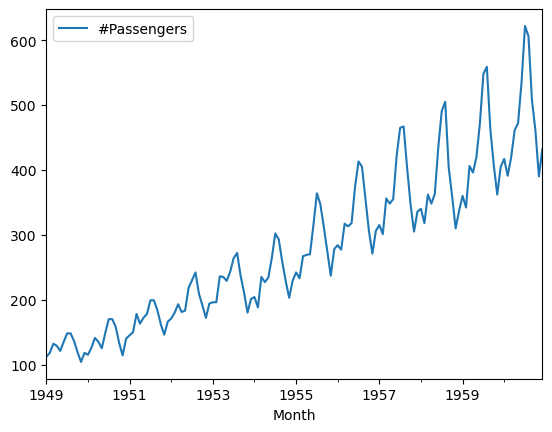

In [16]:
# Plot to check whether do we have trend and seasionality in our data or not
data.plot()

**This graph shows that our data is having both seasionality and Trend**

Figure(640x480)


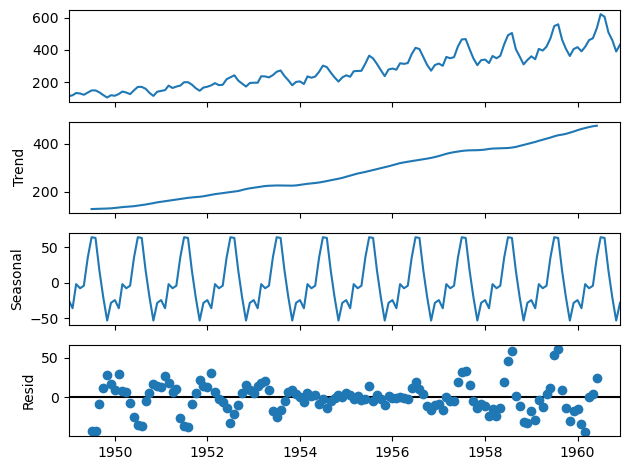

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(data)
print(decomposed.plot())

**Checking that the data is stationary or not**

In [18]:
from statsmodels.tsa.stattools import adfuller # Augumented Dickey Fuller Test
test_value = adfuller(data)

In [19]:
pval = test_value[1]
pval

0.9918802434376411

If pvalues is less than 0.05 then Data is Sationary

If pvalue is greater than 0.05 then Data is Non -Stationary

In [20]:
if pval <0.05 :
  print( "Data is Stationary")
else:
  print("Data is not Stationary")

Data is not Stationary


**As our data is Not Stationary so we need to convert it to Stationary form before model Building**

To convert NS to S form we often use techniques that stabilize the mean and variance over time

1) Remove seasionality

2) Remove trend

In [21]:
# Logarithmic transformation to make the time series stationary
first_log = np.log(data)
first_log = first_log.dropna()  # To drop null values given by np.log
first_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


<Axes: xlabel='Month'>

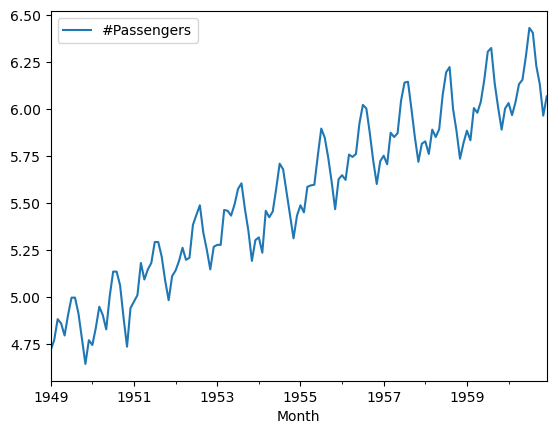

In [22]:
first_log.plot()

In [23]:
# Rolling Mean ( mean_log)
# Rolling Standard Deviation  ( std_log )

mean_log =first_log.rolling(window=12).mean()
std_log =  first_log.rolling(window=12).std()

In [24]:
mean_log.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


**By substracting the rollimg meand from the log transformed data , you are removing trend components from the data**

In [25]:
new_Data=  first_log -mean_log
new_Data = new_Data.dropna()
new_Data.head(20)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


<Axes: xlabel='Month'>

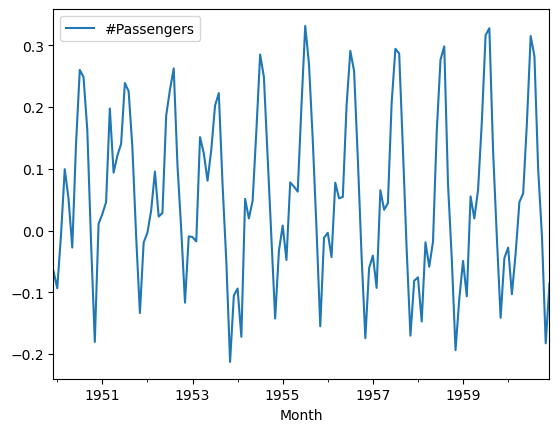

In [26]:
new_Data.plot()

In [27]:
result = adfuller(new_Data)
pvalue =result[1]
pvalue

0.022234630001242695

In [28]:
if pvalue < 0.05 :
  print( "Data is Stationary")
else:
  print("Data is not Stationary")

Data is Stationary


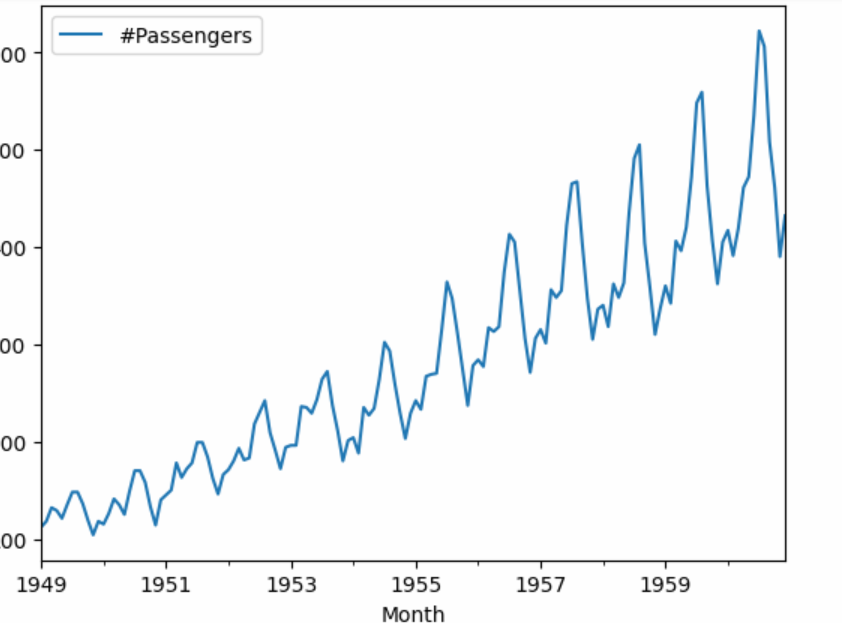






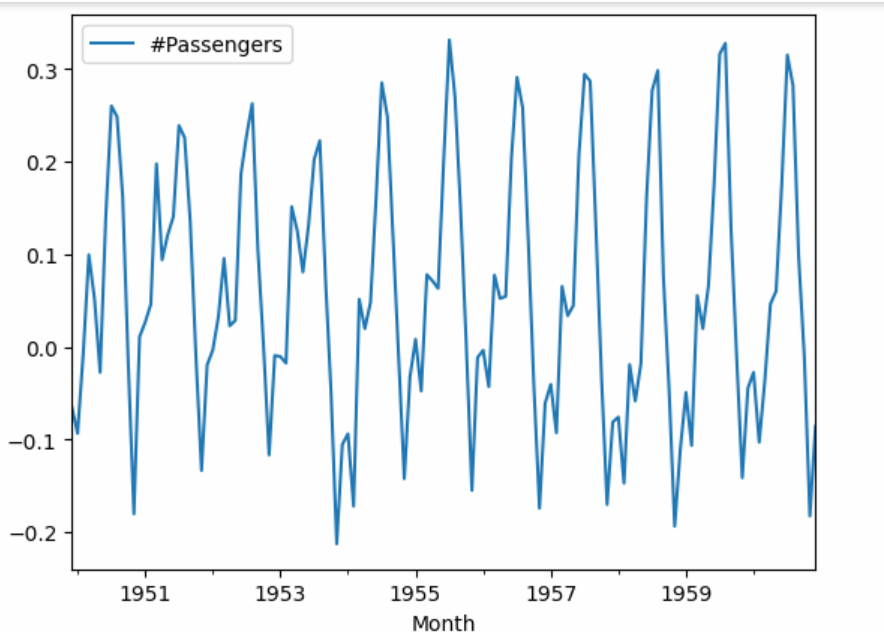





#Model Building

In [29]:
new_Data.shape

(133, 1)

In [30]:
# Splitiing data into training and testing

train = new_Data.iloc[ :121 ]["#Passengers"]

test = new_Data.iloc[ 121 : ]["#Passengers"]

In [31]:
train # From December 1949 to December 1959 total 10 years

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
                ...   
1959-08-01    0.327838
1959-09-01    0.128057
1959-10-01   -0.011315
1959-11-01   -0.141406
1959-12-01   -0.044481
Name: #Passengers, Length: 121, dtype: float64

In [32]:
test  # January 1960 to December 1960 total 1 year

Month
1960-01-01   -0.027530
1960-02-01   -0.103067
1960-03-01   -0.036530
1960-04-01    0.046332
1960-05-01    0.060186
1960-06-01    0.175033
1960-07-01    0.315151
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, dtype: float64

In [33]:
# Implementation of ARIMA model ( AutoRegressive Integerated Moving Average)
from statsmodels.tsa.arima.model import ARIMA

'''
p= Order of lag
d= Degree of differencing
q= order of moving average
'''

'\np= Order of lag\nd= Degree of differencing\nq= order of moving average\n'

In [34]:
A_model = ARIMA(train , order=(6,1,6))

C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
A_model= A_model.fit()

C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
len(train)

121

In [37]:
len(test)

12

In [38]:
# Predict for last 12 months
new_Data["Arima prediction"]= A_model.predict(start=len(train) ,end=len(train)+len(test)-1)

# start = 121
# end = 121+12-1 = 132

In [39]:
121+12-1

132

In [40]:
new_Data.tail(12)

,#Passengers,Arima prediction
Month,,
1960-01-01,-0.027530,-0.029414
1960-02-01,-0.103067,-0.075560
1960-03-01,-0.036530,-0.016889
1960-04-01,0.046332,0.041891
1960-05-01,0.060186,0.158448
1960-06-01,0.175033,0.187269
1960-07-01,0.315151,0.176928
1960-08-01,0.282363,0.156153
1960-09-01,0.098235,0.116094


<Axes: xlabel='Month'>

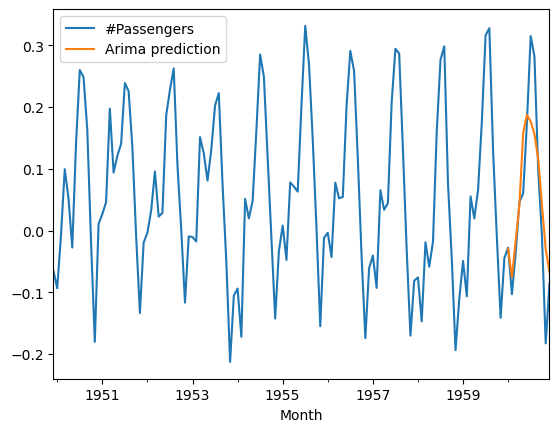

In [41]:
new_Data[["#Passengers" , "Arima prediction"]].plot()

In [42]:
# Finding optimal value of p,d,q with itertools
from sklearn.metrics import *
import itertools
p=range(0,7)
d=range(1,2)
q=range(0,7)

pdq=list(itertools.product(p,d,q))
rmse=[ ]  # empty list to store rmse values
order1=[ ] # To store the p,d,q, value
for i in pdq:
  model =ARIMA(train , order=i)
  model_fit=model.fit()
  pred= model_fit.predict(start=len(train) , end =len(train)+len(test)-1)
  error = np.sqrt(mean_squared_error(test,pred))
  order1.append(i)
  rmse.append(error)

C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freq

In [43]:
result = pd.DataFrame(index=order1 , data=rmse , columns=["RMSE"])
result.sort_values(by="RMSE",ascending=True)

,RMSE
"(4, 1, 6)",0.070437
"(5, 1, 6)",0.075928
"(6, 1, 6)",0.077714
"(6, 1, 1)",0.114338
"(4, 1, 3)",0.125976
"(3, 1, 3)",0.130710
"(6, 1, 2)",0.140352
"(6, 1, 3)",0.140397
"(2, 1, 2)",0.143450
"(3, 1, 4)",0.143882


In [44]:
A_model = ARIMA(train , order=(4,1,6))

C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
A_model = A_model.fit()

C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
new_Data["Arima prediction - 2"] = A_model.predict(start=len(train) , end =len(train)+len(test)-1)

In [47]:
new_Data.tail(12)

,#Passengers,Arima prediction,Arima prediction - 2
Month,,,
1960-01-01,-0.027530,-0.029414,-0.024546
1960-02-01,-0.103067,-0.075560,-0.078749
1960-03-01,-0.036530,-0.016889,-0.003358
1960-04-01,0.046332,0.041891,0.060452
1960-05-01,0.060186,0.158448,0.141259
1960-06-01,0.175033,0.187269,0.203700
1960-07-01,0.315151,0.176928,0.209313
1960-08-01,0.282363,0.156153,0.185152
1960-09-01,0.098235,0.116094,0.132865


<Axes: xlabel='Month'>

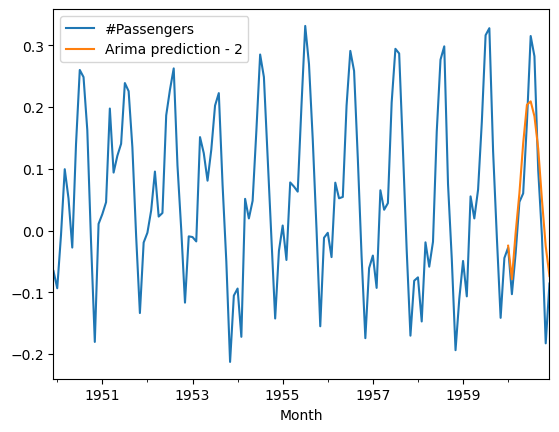

In [48]:
new_Data[["#Passengers" ,"Arima prediction - 2"]].plot()

**SARIMAX**

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
model = SARIMAX(train , order=(6,1,6),seasonal_order=(6,1,6,12))
model = model.fit()

C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Mansi Shah\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
# Predict for next 12 months for year 1960
new_Data["SARIMAX predcition"]=model.predict(start=len(train) , end =len(train)+len(test)-1)

In [52]:
new_Data

,#Passengers,Arima prediction,Arima prediction - 2,SARIMAX predcition
Month,,,,
1949-12-01,-0.065494,NaN,NaN,NaN
1950-01-01,-0.093449,NaN,NaN,NaN
1950-02-01,-0.007566,NaN,NaN,NaN
1950-03-01,0.099416,NaN,NaN,NaN
1950-04-01,0.052142,NaN,NaN,NaN
...,...,...,...,...
1960-08-01,0.282363,0.156153,0.185152,0.326237
1960-09-01,0.098235,0.116094,0.132865,0.138888
1960-10-01,-0.009230,0.041642,0.049797,0.001417


In [53]:
# Ensure mean_log aligns with new_data (they should have the same index after dropna)
# If not, align using reindex:
mean_log_aligned = mean_log.reindex(new_Data.index)

# Apply the inverse transformation to each column
cols = ['#Passengers', 'Arima prediction', 'Arima prediction - 2', 'SARIMAX predcition']

for col in cols:
    # Add rolling mean back, then exponentiate
    new_Data[col + '_original_scale'] = np.exp(new_Data[col] + mean_log_aligned['#Passengers'])

# Now, new_data will have four new columns with the original scale values
#new_Data[[col + '_original_scale' for col in cols]]
new_Data

,#Passengers,Arima prediction,Arima prediction - 2,SARIMAX predcition,#Passengers_original_scale,Arima prediction_original_scale,Arima prediction - 2_original_scale,SARIMAX predcition_original_scale
Month,,,,,,,,
1949-12-01,-0.065494,NaN,NaN,NaN,118.0,NaN,NaN,NaN
1950-01-01,-0.093449,NaN,NaN,NaN,115.0,NaN,NaN,NaN
1950-02-01,-0.007566,NaN,NaN,NaN,126.0,NaN,NaN,NaN
1950-03-01,0.099416,NaN,NaN,NaN,141.0,NaN,NaN,NaN
1950-04-01,0.052142,NaN,NaN,NaN,135.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1960-08-01,0.282363,0.156153,0.185152,0.326237,606.0,534.146444,549.862546,633.179093
1960-09-01,0.098235,0.116094,0.132865,0.138888,508.0,517.153783,525.899863,529.077075
1960-10-01,-0.009230,0.041642,0.049797,0.001417,461.0,485.058829,489.030942,465.934623


<Axes: xlabel='Month'>

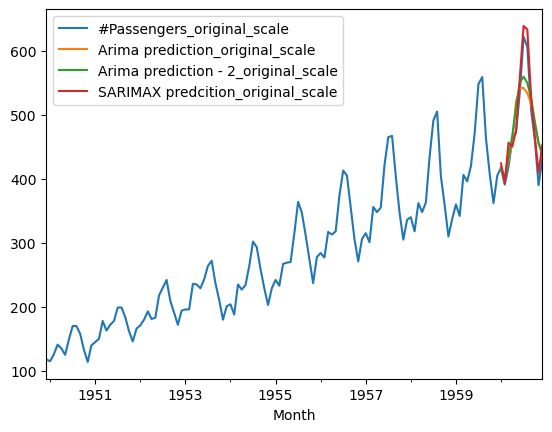

In [54]:
new_Data[['#Passengers_original_scale',	'Arima prediction_original_scale',	'Arima prediction - 2_original_scale',	'SARIMAX predcition_original_scale']].plot()

In [55]:
# Predict for next 5 years ( window size ? )
future=model.forecast(steps=60)



In [56]:
future

1960-01-01   -0.010607
1960-02-01   -0.097579
1960-03-01    0.049006
1960-04-01    0.022625
1960-05-01    0.068296
1960-06-01    0.217539
1960-07-01    0.341766
1960-08-01    0.326237
1960-09-01    0.138888
1960-10-01    0.001417
1960-11-01   -0.133522
1960-12-01   -0.037925
1961-01-01    0.001826
1961-02-01   -0.076674
1961-03-01    0.057427
1961-04-01    0.038441
1961-05-01    0.071361
1961-06-01    0.230126
1961-07-01    0.352139
1961-08-01    0.334696
1961-09-01    0.147677
1961-10-01    0.003041
1961-11-01   -0.137357
1961-12-01   -0.038479
1962-01-01   -0.008656
1962-02-01   -0.090585
1962-03-01    0.048348
1962-04-01    0.023929
1962-05-01    0.064825
1962-06-01    0.229801
1962-07-01    0.346092
1962-08-01    0.339483
1962-09-01    0.140629
1962-10-01   -0.005169
1962-11-01   -0.141224
1962-12-01   -0.053534
1963-01-01   -0.015973
1963-02-01   -0.099367
1963-03-01    0.046623
1963-04-01    0.021247
1963-05-01    0.065601
1963-06-01    0.233546
1963-07-01    0.357917
1963-08-01 

1960-01-01    465.730912
1960-02-01    426.937014
1960-03-01    494.338847
1960-04-01    481.468254
1960-05-01    503.966938
1960-06-01    585.083286
1960-07-01    662.473599
1960-08-01    652.265487
1960-09-01    540.828891
1960-10-01    471.364691
1960-11-01    411.863760
1960-12-01    453.180093
1961-01-01    471.557590
1961-02-01    435.955934
1961-03-01    498.519044
1961-04-01    489.143711
1961-05-01    505.514001
1961-06-01    592.494429
1961-07-01    669.381682
1961-08-01    657.806786
1961-09-01    545.603300
1961-10-01    472.130953
1961-11-01    410.287370
1961-12-01    452.929380
1962-01-01    466.640381
1962-02-01    429.933070
1962-03-01    494.013405
1962-04-01    482.096222
1962-05-01    502.220863
1962-06-01    592.301551
1962-07-01    665.345941
1962-08-01    660.963414
1962-09-01    541.771110
1962-10-01    468.270607
1962-11-01    408.703840
1962-12-01    446.161688
1963-01-01    463.238714
1963-02-01    426.174212
1963-03-01    493.162113
1963-04-01    480.805258


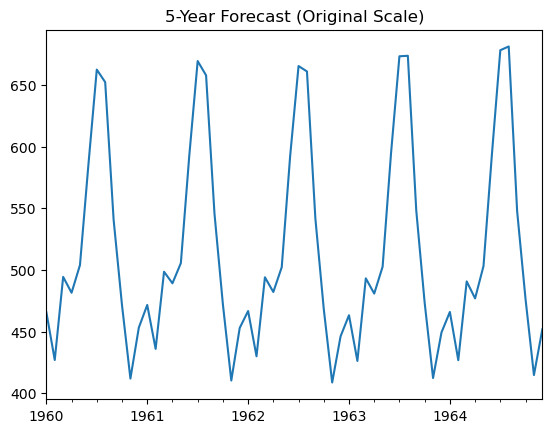

In [57]:
last_mean_log = mean_log.iloc[-1, 0]  # mean_log is a DataFrame with one column

# Create a Series/DataFrame with the same index as 'future'
future_mean_log = pd.Series([last_mean_log] * len(future), index=future.index)

# Step 2: Add rolling mean back to forecasted values
future_log = future + future_mean_log

# Step 3: Exponentiate to get back to original scale
future_original = np.exp(future_log)

# Now 'future_original' contains your forecast in the original scale
print(future_original)

future_original.plot(title="5-Year Forecast (Original Scale)")
plt.show()



<Axes: xlabel='Month'>

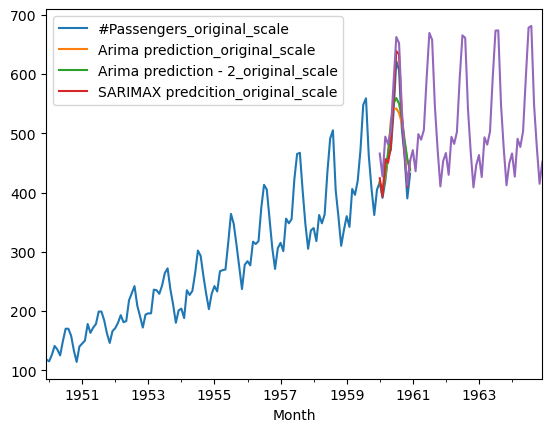

In [58]:
new_Data[['#Passengers_original_scale',	'Arima prediction_original_scale',	'Arima prediction - 2_original_scale',	'SARIMAX predcition_original_scale']].plot()
future_original.plot()

In [59]:
import statsmodels

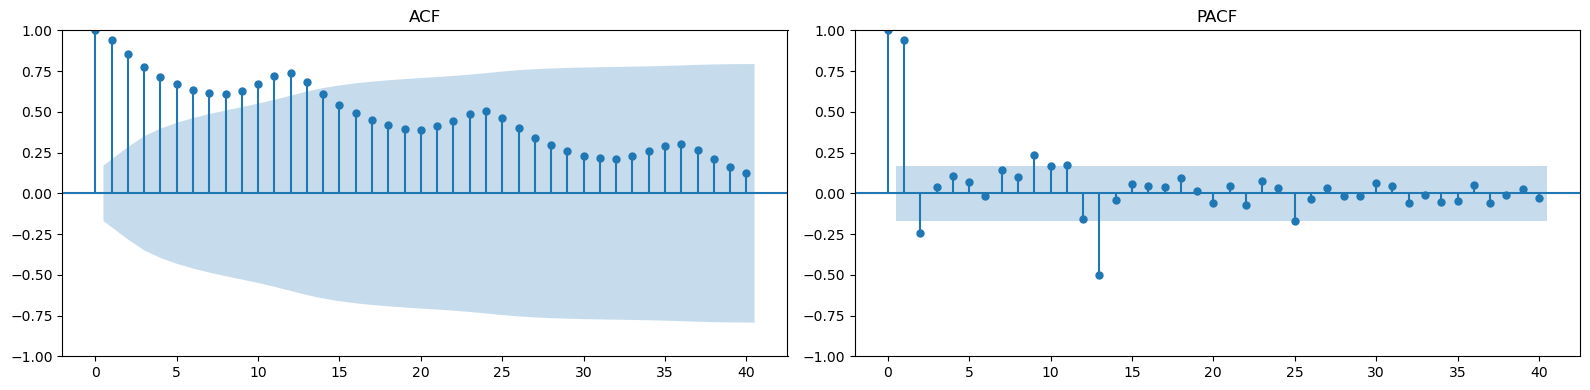

In [63]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,axes=plt.subplots(1,2,figsize=(16,4))
plot_acf(new_Data['#Passengers_original_scale'],lags=40,ax=axes[0])
plot_pacf(new_Data['#Passengers_original_scale'],lags=40,ax=axes[1])
axes[0].set_title("ACF")
axes[1].set_title("PACF")
plt.tight_layout()
plt.show()